<a href="https://colab.research.google.com/github/Zziyuzhang/inf1340-programmingfordatascience-fa22/blob/main/inf1340-programmingfordatascience-fa22/Final-submissions-Ziyu-Zhang/Ziyu_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# import useful modules
import numpy as np
import pandas as pd
from datascience import *

In [102]:
# Colab URL: https://colab.research.google.com/drive/15J9Ldqo9mCXeJnRLahefBgI1uRPPJpvb#scrollTo=-j9k16-DWY2r

In [103]:
# Connect my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Sheet 1 cleaning process**

In [104]:
UN_table1 = pd.read_excel('/content/drive/MyDrive/INF 1340/UN Dataset.xlsx', sheet_name=1) #load the first sheet

In [105]:
UN_table1 = UN_table1.drop(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) # drop those rows in the green title area

In [106]:
UN_table1 = UN_table1.rename({'Unnamed: 0' : 'Sort/Order',
                 'Unnamed: 1' : 'Major area, region, country or area of destination',
                 'Unnamed: 2' : 'Notes',
                 'Unnamed: 3' : 'Country Code',
                 'Unnamed: 4' : 'Type of data (a)',
                 'Unnamed: 5' : '(both sexes) (1990)',
                 'Unnamed: 6' : '(both sexes) (1995)',
                 'Unnamed: 7' : '(both sexes) (2000)',
                 'Unnamed: 8' : '(both sexes) (2005)',
                 'Unnamed: 9' : '(both sexes) (2010)',
                 'Unnamed: 10': '(both sexes) (2015)',
                 'Unnamed: 11': '(male) (1990)',
                 'Unnamed: 12': '(male) (1995)',
                 'Unnamed: 13': '(male) (2000)',
                 'Unnamed: 14': '(male) (2005)',
                 'Unnamed: 15': '(male) (2010)',
                 'Unnamed: 16': '(male) (2015)',
                 'Unnamed: 17': '(female) (1990)',
                 'Unnamed: 18': '(female) (1995)',
                 'Unnamed: 19': '(female) (2000)',
                 'Unnamed: 20': '(female) (2005)',
                 'Unnamed: 21': '(female) (2010)',
                 'Unnamed: 22': '(female) (2015)'}, axis = 1) # Rename the column header to make it more clearer

In [107]:
#After the rename process, row 13 and row 14 are meaningless, drop them
UN_table1.drop(index = [13, 14], inplace = True) # replace the old one

In [108]:
UN_table1 = UN_table1.fillna('') #Replace the NaN value with empty strings

In [109]:
UN_International_migrant_stock_both_sex = UN_table1.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(both sexes) (1990)',
                            '(both sexes) (1995)',
                            '(both sexes) (2000)',
                            '(both sexes) (2005)',
                            '(both sexes) (2010)',
                            '(both sexes) (2015)'],
               var_name = 'Year',
               value_name = 'International migrant stock') ## Use melt function to create a new database that only contain data of both sexes

In [110]:
UN_International_migrant_stock_male = UN_table1.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(male) (1990)',
                            '(male) (1995)',
                            '(male) (2000)',
                            '(male) (2005)',
                            '(male) (2010)',
                            '(male) (2015)'],
               var_name = 'Year',
               value_name = 'International migrant stock') ## Use melt function to create a new database that only contain data of male

In [111]:
UN_International_migrant_stock_female = UN_table1.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(female) (1990)',
                            '(female) (1995)',
                            '(female) (2000)',
                            '(female) (2005)',
                            '(female) (2010)',
                            '(female) (2015)'],
               var_name = 'Year',
               value_name = 'International migrant stock') ## Use melt function to create a new database that only contain data of female

In [112]:
# Now I get three new dataset named 1)UN_International_migrant_stock_both_sex, 2)UN_International_migrant_stock_male, 3)UN_International_migrant_stock_female
# For these dataset, I still want to show only year in the column sex and year
UN_International_migrant_stock_both_sex = (UN_International_migrant_stock_both_sex.assign(Year = lambda x: x.Year.str[13:].astype(str)))

In [113]:
UN_international_migrant_stock_bothsexes_1990 = UN_International_migrant_stock_both_sex[0:265].reset_index(drop = True)
UN_international_migrant_stock_bothsexes_1995 = UN_International_migrant_stock_both_sex[265:530].reset_index(drop = True)
UN_international_migrant_stock_bothsexes_2000 = UN_International_migrant_stock_both_sex[530:795].reset_index(drop = True)
UN_international_migrant_stock_bothsexes_2005 = UN_International_migrant_stock_both_sex[795:1060].reset_index(drop = True)
UN_international_migrant_stock_bothsexes_2010 = UN_International_migrant_stock_both_sex[1060:1325].reset_index(drop = True)
UN_international_migrant_stock_bothsexes_2015 = UN_International_migrant_stock_both_sex[1325:].reset_index(drop = True)
#Based on the UN_international_migrant_stock_bothsexes database, I separate it to 6 dataframes from 1990 to 2015

In [114]:
UN_International_migrant_stock_male = (UN_International_migrant_stock_male.assign(Year = lambda x: x.Year.str[7:].astype(str)))
# Same operation to UN_International_migrant_stock_male

In [115]:
UN_international_migrant_stock_male_1990 = UN_International_migrant_stock_male[0:265].reset_index(drop = True)
UN_international_migrant_stock_male_1995 = UN_International_migrant_stock_male[265:530].reset_index(drop = True)
UN_international_migrant_stock_male_2000 = UN_International_migrant_stock_male[530:795].reset_index(drop = True)
UN_international_migrant_stock_male_2005 = UN_International_migrant_stock_male[795:1060].reset_index(drop = True)
UN_international_migrant_stock_male_2010 = UN_International_migrant_stock_male[1060:1325].reset_index(drop = True)
UN_international_migrant_stock_male_2015 = UN_International_migrant_stock_male[1325:].reset_index(drop = True)
# Another 6 dataframes for UN_International_migrant_stock_male

In [116]:
UN_International_migrant_stock_female = (UN_International_migrant_stock_female.assign(Year = lambda x: x.Year.str[9:].astype(str)))
# Same operation to UN_International_migrant_stock_female

In [117]:
UN_international_migrant_stock_female_1990 = UN_International_migrant_stock_female[0:265].reset_index(drop = True)
UN_international_migrant_stock_female_1995 = UN_International_migrant_stock_female[265:530].reset_index(drop = True)
UN_international_migrant_stock_female_2000 = UN_International_migrant_stock_female[530:795].reset_index(drop = True)
UN_international_migrant_stock_female_2005 = UN_International_migrant_stock_female[795:1060].reset_index(drop = True)
UN_international_migrant_stock_female_2010 = UN_International_migrant_stock_female[1060:1325].reset_index(drop = True)
UN_international_migrant_stock_female_2015 = UN_International_migrant_stock_female[1325:].reset_index(drop = True)
# Another 6 dataframes for UN_International_migrant_stock_female

**Sheet 2 Cleaning process**

In [118]:
UN_table2 = pd.read_excel('/content/drive/MyDrive/INF 1340/UN Dataset.xlsx', sheet_name=2) # load the second sheet

In [119]:
UN_table2 = UN_table2.drop(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) # drop those rows in the green title area

In [120]:
UN_table2_total_pulation = UN_table2.rename({'Unnamed: 0' : 'Sort/Order',
                 'Unnamed: 1' : 'Major area, region, country or area of destination',
                 'Unnamed: 2' : 'Notes',
                 'Unnamed: 3' : 'Country Code',
                 'Unnamed: 4' : '(both sexes) (1990)',
                 'Unnamed: 5' : '(both sexes) (1995)',
                 'Unnamed: 6' : '(both sexes) (2000)',
                 'Unnamed: 7' : '(both sexes) (2005)',
                 'Unnamed: 8' : '(both sexes) (2010)',
                 'Unnamed: 9': '(both sexes) (2015)',
                 'Unnamed: 10': '(male) (1990)',
                 'Unnamed: 11': '(male) (1995)',
                 'Unnamed: 12': '(male) (2000)',
                 'Unnamed: 13': '(male) (2005)',
                 'Unnamed: 14': '(male) (2010)',
                 'Unnamed: 15': '(male) (2015)',
                 'Unnamed: 16': '(female) (1990)',
                 'Unnamed: 17': '(female) (1995)',
                 'Unnamed: 18': '(female) (2000)',
                 'Unnamed: 19': '(female) (2005)',
                 'Unnamed: 20': '(female) (2010)',
                 'Unnamed: 21': '(female) (2015)'}, axis = 1) # Rename the column header to make it more clearer

In [121]:
UN_table2_total_pulation = UN_table2_total_pulation.drop(index = [13, 14]) # Now drop the row 13, 14

In [122]:
UN_table2_total_pulation = UN_table2_total_pulation.fillna('') #Replace the NaN value with empty strings

In [123]:
UN_total_population_both_sex = UN_table2_total_pulation.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code'],
              value_vars = ['(both sexes) (1990)',
                            '(both sexes) (1995)',
                            '(both sexes) (2000)',
                            '(both sexes) (2005)',
                            '(both sexes) (2010)',
                            '(both sexes) (2015)'],
               var_name = 'Year',
               value_name = 'Total Population at Mid-year') # Use melt function to get the table of total population of both sexes

In [124]:
UN_total_population_male = UN_table2_total_pulation.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code'],
              value_vars = ['(male) (1990)',
                            '(male) (1995)',
                            '(male) (2000)',
                            '(male) (2005)',
                            '(male) (2010)',
                            '(male) (2015)'],
               var_name = 'Year',
               value_name = 'Total Population at Mid-year')# Use melt function to get the table of total population of males

In [125]:
UN_total_population_female = UN_table2_total_pulation.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code'],
              value_vars = ['(female) (1990)',
                            '(female) (1995)',
                            '(female) (2000)',
                            '(female) (2005)',
                            '(female) (2010)',
                            '(female) (2015)'],
               var_name = 'Year',
               value_name = 'Total Population at Mid-year') # Use melt function to get the table of total population of females

In [126]:
# Now I got three different dataframes named 1)UN_total_pupulation_both_sexes, 2)UN_total_population_male, 3)UN_total_population_female
# I only want to show year in the year column
UN_total_population_both_sex = (UN_total_population_both_sex.assign(Year = lambda x: x.Year.str[13:].astype(str)))
UN_total_population_male = (UN_total_population_male.assign(Year = lambda x: x.Year.str[7:].astype(str)))
UN_total_population_female = (UN_total_population_female.assign(Year = lambda x: x.Year.str[9:].astype(str)))

In [127]:
# Now separating dataframe of bothsexes into 6 different dataframes of 6 different years
UN_total_population_bothsexes_1990 = UN_total_population_both_sex[0:265].reset_index(drop = True)
UN_total_population_bothsexes_1995 = UN_total_population_both_sex[265:530].reset_index(drop = True)
UN_total_population_bothsexes_2000 = UN_total_population_both_sex[530:795].reset_index(drop = True)
UN_total_population_bothsexes_2005 = UN_total_population_both_sex[795:1060].reset_index(drop = True)
UN_total_population_bothsexes_2010 = UN_total_population_both_sex[1060:1325].reset_index(drop = True)
UN_total_population_bothsexes_2015 = UN_total_population_both_sex[1325:].reset_index(drop = True)

In [128]:
# Now separating dataframe of famle into 6 different dataframes of 6 different years
UN_total_population_female_1990 = UN_total_population_female[0:265].reset_index(drop = True)
UN_total_population_female_1995 = UN_total_population_female[265:530].reset_index(drop = True)
UN_total_population_female_2000 = UN_total_population_female[530:795].reset_index(drop = True)
UN_total_population_female_2005 = UN_total_population_female[795:1060].reset_index(drop = True)
UN_total_population_female_2010 = UN_total_population_female[1060:1325].reset_index(drop = True)
UN_total_population_female_2015 = UN_total_population_female[1325:].reset_index(drop = True)

In [129]:
# Now separating dataframe of male into 6 different dataframes of 6 different years
UN_total_population_male_1990 = UN_total_population_male[0:265].reset_index(drop = True)
UN_total_population_male_1995 = UN_total_population_male[265:530].reset_index(drop = True)
UN_total_population_male_2000 = UN_total_population_male[530:795].reset_index(drop = True)
UN_total_population_male_2005 = UN_total_population_male[795:1060].reset_index(drop = True)
UN_total_population_male_2010 = UN_total_population_male[1060:1325].reset_index(drop = True)
UN_total_population_male_2015 = UN_total_population_male[1325:].reset_index(drop = True)

In [130]:
# Now I want to merge data of International Migrant Stock and Total population of different years
# These will be our total data of UN both sexes
UN_1990_both_sexes = UN_international_migrant_stock_bothsexes_1990.merge(UN_total_population_bothsexes_1990, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_1995_both_sexes = UN_international_migrant_stock_bothsexes_1995.merge(UN_total_population_bothsexes_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2000_both_sexes = UN_international_migrant_stock_bothsexes_2000.merge(UN_total_population_bothsexes_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2005_both_sexes = UN_international_migrant_stock_bothsexes_2005.merge(UN_total_population_bothsexes_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2010_both_sexes = UN_international_migrant_stock_bothsexes_2010.merge(UN_total_population_bothsexes_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2015_both_sexes = UN_international_migrant_stock_bothsexes_2015.merge(UN_total_population_bothsexes_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])

In [131]:
# These will be our total data of UN male
UN_1990_female = UN_international_migrant_stock_female_1990.merge(UN_total_population_female_1990, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_1995_female = UN_international_migrant_stock_female_1995.merge(UN_total_population_female_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2000_female = UN_international_migrant_stock_female_2000.merge(UN_total_population_female_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2005_female = UN_international_migrant_stock_female_2005.merge(UN_total_population_female_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2010_female = UN_international_migrant_stock_female_2010.merge(UN_total_population_female_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2015_female = UN_international_migrant_stock_female_2015.merge(UN_total_population_female_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])

In [132]:
# These will be our total data of UN female
UN_1990_male = UN_international_migrant_stock_male_1990.merge(UN_total_population_male_1990, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_1995_male = UN_international_migrant_stock_male_1995.merge(UN_total_population_male_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2000_male = UN_international_migrant_stock_male_2000.merge(UN_total_population_male_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2005_male = UN_international_migrant_stock_male_2005.merge(UN_total_population_male_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2010_male = UN_international_migrant_stock_male_2010.merge(UN_total_population_male_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])
UN_2015_male = UN_international_migrant_stock_male_2015.merge(UN_total_population_male_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year'])

**Sheet 3 Cleaning Process**

In [133]:
UN_table3 = pd.read_excel('/content/drive/MyDrive/INF 1340/UN Dataset.xlsx', sheet_name=3) #load the third sheet

In [134]:
UN_table3 = UN_table3.drop(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) # drop the rows in the green title area and rows contain the column name

In [135]:
UN_table3 = UN_table3.rename({'Unnamed: 0' : 'Sort/Order',
                 'Unnamed: 1' : 'Major area, region, country or area of destination',
                 'Unnamed: 2' : 'Notes',
                 'Unnamed: 3' : 'Country Code',
                 'Unnamed: 4' : 'Type of data (a)',
                 'Unnamed: 5' : '(both sexes) (1990)',
                 'Unnamed: 6' : '(both sexes) (1995)',
                 'Unnamed: 7' : '(both sexes) (2000)',
                 'Unnamed: 8' : '(both sexes) (2005)',
                 'Unnamed: 9' : '(both sexes) (2010)',
                 'Unnamed: 10': '(both sexes) (2015)',
                 'Unnamed: 11': '(male) (1990)',
                 'Unnamed: 12': '(male) (1995)',
                 'Unnamed: 13': '(male) (2000)',
                 'Unnamed: 14': '(male) (2005)',
                 'Unnamed: 15': '(male) (2010)',
                 'Unnamed: 16': '(male) (2015)',
                 'Unnamed: 17': '(female) (1990)',
                 'Unnamed: 18': '(female) (1995)',
                 'Unnamed: 19': '(female) (2000)',
                 'Unnamed: 20': '(female) (2005)',
                 'Unnamed: 21': '(female) (2010)',
                 'Unnamed: 22': '(female) (2015)'}, axis = 1) # Column renaming proces

In [136]:
UN_table3 = UN_table3.fillna('') #Replace the NaN value with empty strings

In [137]:
UN_migrant_percentage_both_sex = UN_table3.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(both sexes) (1990)',
                            '(both sexes) (1995)',
                            '(both sexes) (2000)',
                            '(both sexes) (2005)',
                            '(both sexes) (2010)',
                            '(both sexes) (2015)'],
               var_name = 'Year',
               value_name = 'International migrant stock as a percentage of total population') # Use melt function to get the data of both sexes

In [138]:
UN_migrant_percentage_male = UN_table3.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(male) (1990)',
                            '(male) (1995)',
                            '(male) (2000)',
                            '(male) (2005)',
                            '(male) (2010)',
                            '(male) (2015)'],
               var_name = 'Year',
               value_name = 'International migrant stock as a percentage of total population') #Use melt function to get the data of males

In [139]:
UN_migrant_percentage_female = UN_table3.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(female) (1990)',
                            '(female) (1995)',
                            '(female) (2000)',
                            '(female) (2005)',
                            '(female) (2010)',
                            '(female) (2015)'],
               var_name = 'Year',
               value_name = 'International migrant stock as a percentage of total population') # Use melt function to get the data of females

In [140]:
# Now I only want to show year in the Year column in each dataframe
UN_migrant_percentage_both_sex = (UN_migrant_percentage_both_sex.assign(Year = lambda x: x.Year.str[13:].astype(str)))
UN_migrant_percentage_male = (UN_migrant_percentage_male.assign(Year = lambda x: x.Year.str[7:].astype(str)))
UN_migrant_percentage_female = (UN_migrant_percentage_female.assign(Year = lambda x: x.Year.str[9:].astype(str)))

In [141]:
# Now separating dataframe of bothsexes into 6 different dataframes of 6 different years
UN_migrant_percentage_both_sex_1990 = UN_migrant_percentage_both_sex[0:265].reset_index(drop = True)
UN_migrant_percentage_both_sex_1995 = UN_migrant_percentage_both_sex[265:530].reset_index(drop = True)
UN_migrant_percentage_both_sex_2000 = UN_migrant_percentage_both_sex[530:795].reset_index(drop = True)
UN_migrant_percentage_both_sex_2005 = UN_migrant_percentage_both_sex[795:1060].reset_index(drop = True)
UN_migrant_percentage_both_sex_2010 = UN_migrant_percentage_both_sex[1060:1325].reset_index(drop = True)
UN_migrant_percentage_both_sex_2015 = UN_migrant_percentage_both_sex[1325:].reset_index(drop = True)

In [142]:
# Now separating dataframe of males into 6 different dataframes of 6 different years
UN_migrant_percentage_male_1990 = UN_migrant_percentage_male[0:265].reset_index(drop = True)
UN_migrant_percentage_male_1995 = UN_migrant_percentage_male[265:530].reset_index(drop = True)
UN_migrant_percentage_male_2000 = UN_migrant_percentage_male[530:795].reset_index(drop = True)
UN_migrant_percentage_male_2005 = UN_migrant_percentage_male[795:1060].reset_index(drop = True)
UN_migrant_percentage_male_2010 = UN_migrant_percentage_male[1060:1325].reset_index(drop = True)
UN_migrant_percentage_male_2015 = UN_migrant_percentage_male[1325:].reset_index(drop = True)

In [143]:
# Now separating dataframe of females into 6 different dataframes of 6 different years
UN_migrant_percentage_female_1990 = UN_migrant_percentage_female[0:265].reset_index(drop = True)
UN_migrant_percentage_female_1995 = UN_migrant_percentage_female[265:530].reset_index(drop = True)
UN_migrant_percentage_female_2000 = UN_migrant_percentage_female[530:795].reset_index(drop = True)
UN_migrant_percentage_female_2005 = UN_migrant_percentage_female[795:1060].reset_index(drop = True)
UN_migrant_percentage_female_2010 = UN_migrant_percentage_female[1060:1325].reset_index(drop = True)
UN_migrant_percentage_female_2015 = UN_migrant_percentage_female[1325:].reset_index(drop = True)

In [144]:
# After we got 18 different data frames, it is time to merge these data frames to our total UN dataframes
UN_1990_both_sexes = UN_1990_both_sexes.merge(UN_migrant_percentage_both_sex_1990, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_1995_both_sexes = UN_1995_both_sexes.merge(UN_migrant_percentage_both_sex_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2000_both_sexes = UN_2000_both_sexes.merge(UN_migrant_percentage_both_sex_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2005_both_sexes = UN_2005_both_sexes.merge(UN_migrant_percentage_both_sex_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2010_both_sexes = UN_2010_both_sexes.merge(UN_migrant_percentage_both_sex_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2015_both_sexes = UN_2015_both_sexes.merge(UN_migrant_percentage_both_sex_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])

In [145]:
UN_1990_female = UN_1990_female.merge(UN_migrant_percentage_female_1990, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_1995_female = UN_1995_female.merge(UN_migrant_percentage_female_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2000_female = UN_2000_female.merge(UN_migrant_percentage_female_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2005_female = UN_2005_female.merge(UN_migrant_percentage_female_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2010_female = UN_2010_female.merge(UN_migrant_percentage_female_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2015_female = UN_2015_female.merge(UN_migrant_percentage_female_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])

In [146]:
UN_1990_male = UN_1990_male.merge(UN_migrant_percentage_male_1990, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_1995_male = UN_1995_male.merge(UN_migrant_percentage_male_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2000_male = UN_2000_male.merge(UN_migrant_percentage_male_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2005_male = UN_2005_male.merge(UN_migrant_percentage_male_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2010_male = UN_2010_male.merge(UN_migrant_percentage_male_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2015_male = UN_2015_male.merge(UN_migrant_percentage_male_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])

**Sheet 4 Cleaning Process**

In [147]:
UN_table4 = pd.read_excel('/content/drive/MyDrive/INF 1340/UN Dataset.xlsx', sheet_name=4) #load the data

In [148]:
UN_table4 = UN_table4.drop(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) # drop the rows in the green title area and contain column name

In [149]:
# Column Renaming Process
UN_table4 = UN_table4.rename({'Unnamed: 0' : 'Sort/Order',
                 'Unnamed: 1' : 'Major area, region, country or area of destination',
                 'Unnamed: 2' : 'Notes',
                 'Unnamed: 3' : 'Country Code',
                 'Unnamed: 4' : 'Type of data (a)',
                 'Unnamed: 5' : '(female) (1990)',
                 'Unnamed: 6' : '(female) (1995)',
                 'Unnamed: 7' : '(female) (2000)',
                 'Unnamed: 8' : '(female) (2005)',
                 'Unnamed: 9' : '(female) (2010)',
                 'Unnamed: 10': '(female) (2015)',}, axis = 1)

In [150]:
#Filling the Nah value with empty string
UN_table4 = UN_table4.fillna('')

In [151]:
UN_female_percentage = UN_table4.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(female) (1990)',
                            '(female) (1995)',
                            '(female) (2000)',
                            '(female) (2005)',
                            '(female) (2010)',
                            '(female) (2015)'],
               var_name = 'Year',
               value_name = 'Female migrants as a percentage of International Migrant Stock') #Use melt function

In [152]:
# Now I only want to show year in the Year Column
UN_female_percentage = (UN_female_percentage.assign(Year = lambda x: x.Year.str[9:].astype(str)))

In [153]:
# Separating the dataframe to 6 different dataframes according to year
UN_female_percentage_1990 = UN_female_percentage[0:265].reset_index(drop = True)
UN_female_percentage_1995 = UN_female_percentage[265:530].reset_index(drop = True)
UN_female_percentage_2000 = UN_female_percentage[530:795].reset_index(drop = True)
UN_female_percentage_2005 = UN_female_percentage[795:1060].reset_index(drop = True)
UN_female_percentage_2010 = UN_female_percentage[1060:1325].reset_index(drop = True)
UN_female_percentage_2015 = UN_female_percentage[1325:].reset_index(drop = True)

In [154]:
# Since we only got female percentage in this sheet, we only merge these dataframes to our UN female dataframes
UN_1990_female = UN_1990_female.merge(UN_female_percentage_1990, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_1995_female = UN_1995_female.merge(UN_female_percentage_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2000_female = UN_2000_female.merge(UN_female_percentage_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2005_female = UN_2005_female.merge(UN_female_percentage_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2010_female = UN_2010_female.merge(UN_female_percentage_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2015_female = UN_2015_female.merge(UN_female_percentage_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])

**Sheet 5 Cleaning Process**

In [155]:
UN_table5 = pd.read_excel('/content/drive/MyDrive/INF 1340/UN Dataset.xlsx', sheet_name=5) #load data

In [156]:
UN_table5 = UN_table5.drop(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) # drop the rows in the green title area and contan column name

In [157]:
UN_table5 = UN_table5.rename({'Unnamed: 0' : 'Sort/Order',
                 'Unnamed: 1' : 'Major area, region, country or area of destination',
                 'Unnamed: 2' : 'Notes',
                 'Unnamed: 3' : 'Country Code',
                 'Unnamed: 4' : 'Type of data (a)',
                 'Unnamed: 5' : '(both sexes) (1990-1995)',
                 'Unnamed: 6' : '(both sexes) (1995-2000)',
                 'Unnamed: 7' : '(both sexes) (2000-2005)',
                 'Unnamed: 8' : '(both sexes) (2005-2010)',
                 'Unnamed: 9' : '(both sexes) (2010-2015)',
                 'Unnamed: 10': '(male) (1990-1995)',
                 'Unnamed: 11': '(male) (1995-2000)',
                 'Unnamed: 12': '(male) (2000-2005)',
                 'Unnamed: 13': '(male) (2005-2010)',
                 'Unnamed: 14': '(male) (2010-2015)',
                 'Unnamed: 15': '(female) (1990-1995)',
                 'Unnamed: 16': '(female) (1995-2000)',
                 'Unnamed: 17': '(female) (2000-2005)',
                 'Unnamed: 18': '(female) (2005-2010)',
                 'Unnamed: 19': '(female) (2010-2015)',}, axis = 1) # Column Renaming Process

In [158]:
UN_table5 = UN_table5.fillna('') #Replace the NaN value with empty string

In [159]:
UN_migrant_stock_change_both_sex = UN_table5.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(both sexes) (1990-1995)',
                            '(both sexes) (1995-2000)',
                            '(both sexes) (2000-2005)',
                            '(both sexes) (2005-2010)',
                            '(both sexes) (2010-2015)'],
               var_name = 'Period', #Use time period instead of year because it is rate of change in a 5-year time period
               value_name = 'Annual rate of change of migrant stock in Period') #Use melt function to get the data of both sexes

In [160]:
UN_migrant_stock_change_male = UN_table5.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(male) (1990-1995)',
                            '(male) (1995-2000)',
                            '(male) (2000-2005)',
                            '(male) (2005-2010)',
                            '(male) (2010-2015)'],
               var_name = 'Period',
               value_name = 'Annual rate of change of migrant stock in Period') #Use melt function to get the data of male

In [161]:
UN_migrant_stock_change_female = UN_table5.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['(female) (1990-1995)',
                            '(female) (1995-2000)',
                            '(female) (2000-2005)',
                            '(female) (2005-2010)',
                            '(female) (2010-2015)'],
               var_name = 'Period',
               value_name = 'Annual rate of change of migrant stock in Period') #Use melth function to get the data of female

In [162]:
# Now I only want to show year in the Year column
UN_migrant_stock_change_both_sex = (UN_migrant_stock_change_both_sex.assign(Period = lambda x: x.Period.str[13:].astype(str)))
UN_migrant_stock_change_male = (UN_migrant_stock_change_male.assign(Period = lambda x: x.Period.str[7:].astype(str)))
UN_migrant_stock_change_female = (UN_migrant_stock_change_female.assign(Period = lambda x: x.Period.str[9:].astype(str)))

In [163]:
# Different to previous, we only separate it to 5 different dataframes for each sex since we there is no data before 1990
UN_migrant_stock_change_both_sex_1990_1995 = UN_migrant_stock_change_both_sex[0:265].reset_index(drop = True)
UN_migrant_stock_change_both_sex_1995_2000 = UN_migrant_stock_change_both_sex[265:530].reset_index(drop = True)
UN_migrant_stock_change_both_sex_2000_2005 = UN_migrant_stock_change_both_sex[530:795].reset_index(drop = True)
UN_migrant_stock_change_both_sex_2005_2010 = UN_migrant_stock_change_both_sex[795:1060].reset_index(drop = True)
UN_migrant_stock_change_both_sex_2010_2015 = UN_migrant_stock_change_both_sex[1060:1325].reset_index(drop = True)

In [164]:
UN_migrant_stock_change_male_1990_1995 = UN_migrant_stock_change_male[0:265].reset_index(drop = True)
UN_migrant_stock_change_male_1995_2000 = UN_migrant_stock_change_male[265:530].reset_index(drop = True)
UN_migrant_stock_change_male_2000_2005 = UN_migrant_stock_change_male[530:795].reset_index(drop = True)
UN_migrant_stock_change_male_2005_2010 = UN_migrant_stock_change_male[795:1060].reset_index(drop = True)
UN_migrant_stock_change_male_2010_2015 = UN_migrant_stock_change_male[1060:1325].reset_index(drop = True)

In [165]:
UN_migrant_stock_change_female_1990_1995 = UN_migrant_stock_change_female[0:265].reset_index(drop = True)
UN_migrant_stock_change_female_1995_2000 = UN_migrant_stock_change_female[265:530].reset_index(drop = True)
UN_migrant_stock_change_female_2000_2005 = UN_migrant_stock_change_female[530:795].reset_index(drop = True)
UN_migrant_stock_change_female_2005_2010 = UN_migrant_stock_change_female[795:1060].reset_index(drop = True)
UN_migrant_stock_change_female_2010_2015 = UN_migrant_stock_change_female[1060:1325].reset_index(drop = True)

In [166]:
# Since we do not have data before 1990, I choose not to merge these dataframes to the UN_1990 dataframe for female, male, both sexes
UN_1995_female = UN_1995_female.merge(UN_migrant_stock_change_female_1990_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2000_female = UN_2000_female.merge(UN_migrant_stock_change_female_1995_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2005_female = UN_2005_female.merge(UN_migrant_stock_change_female_2000_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2010_female = UN_2010_female.merge(UN_migrant_stock_change_female_2005_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2015_female = UN_2015_female.merge(UN_migrant_stock_change_female_2010_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])

In [167]:
UN_1995_male = UN_1995_male.merge(UN_migrant_stock_change_male_1990_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2000_male = UN_2000_male.merge(UN_migrant_stock_change_male_1995_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2005_male = UN_2005_male.merge(UN_migrant_stock_change_male_2000_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2010_male = UN_2010_male.merge(UN_migrant_stock_change_male_2005_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2015_male = UN_2015_male.merge(UN_migrant_stock_change_male_2010_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])

In [168]:
UN_1995_both_sexes = UN_1995_both_sexes.merge(UN_migrant_stock_change_both_sex_1990_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2000_both_sexes = UN_2000_both_sexes.merge(UN_migrant_stock_change_both_sex_1995_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2005_both_sexes = UN_2005_both_sexes.merge(UN_migrant_stock_change_both_sex_2000_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2010_both_sexes = UN_2010_both_sexes.merge(UN_migrant_stock_change_both_sex_2005_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])
UN_2015_both_sexes = UN_2015_both_sexes.merge(UN_migrant_stock_change_both_sex_2010_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Type of data (a)'])

**Sheet 6 Cleaning process**

In [169]:
UN_table6 = pd.read_excel('/content/drive/MyDrive/INF 1340/UN Dataset.xlsx', sheet_name=6) #load the sixth sheet

In [170]:
UN_table6 = UN_table6.drop(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) # drop the rows in the green title area and contain column name

In [171]:
UN_table6 = UN_table6.rename({'Unnamed: 0' : 'Sort/Order',
                 'Unnamed: 1' : 'Major area, region, country or area of destination',
                 'Unnamed: 2' : 'Notes',
                 'Unnamed: 3' : 'Country Code',
                 'Unnamed: 4' : 'Type of data (a)',
                 'Unnamed: 5' : 'Estimated Refugee stock (1990)',
                 'Unnamed: 6' : 'Estimated Refugee stock (1995)',
                 'Unnamed: 7' : 'Estimated Refugee stock (2000)',
                 'Unnamed: 8' : 'Estimated Refugee stock (2005)',
                 'Unnamed: 9' : 'Estimated Refugee stock (2010)',
                 'Unnamed: 10': 'Estimated Refugee stock (2015)',
                 'Unnamed: 11': 'Refugees as a percentage of the international migrant stock (1990)',
                 'Unnamed: 12': 'Refugees as a percentage of the international migrant stock (1995)',
                 'Unnamed: 13': 'Refugees as a percentage of the international migrant stock (2000)',
                 'Unnamed: 14': 'Refugees as a percentage of the international migrant stock (2005)',
                 'Unnamed: 15': 'Refugees as a percentage of the international migrant stock (2010)',
                 'Unnamed: 16': 'Refugees as a percentage of the international migrant stock (2015)',
                 'Unnamed: 17': 'Annual Rate of change of the refugee stock (1990-1995)',
                 'Unnamed: 18': 'Annual Rate of change of the refugee stock (1995-2000)',
                 'Unnamed: 19': 'Annual Rate of change of the refugee stock (2000-2005)',
                 'Unnamed: 20': 'Annual Rate of change of the refugee stock (2005-2010)',
                 'Unnamed: 21': 'Annual Rate of change of the refugee stock (2010-2015)'}, axis = 1) # Column Renaming Process

In [172]:
UN_table6 = UN_table6.fillna('') #Replace the NaN value with empty string

In [173]:
UN_refugee_stock = UN_table6.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['Estimated Refugee stock (1990)',
                            'Estimated Refugee stock (1995)',
                            'Estimated Refugee stock (2000)',
                            'Estimated Refugee stock (2005)',
                            'Estimated Refugee stock (2010)',
                            'Estimated Refugee stock (2015)'],
               var_name = 'Year',
               value_name = 'Estimated Refugee Stock') #Use melt function to get the data of refugee stock

In [174]:
UN_refugee_percentage_migrant = UN_table6.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['Refugees as a percentage of the international migrant stock (1990)',
                            'Refugees as a percentage of the international migrant stock (1995)',
                            'Refugees as a percentage of the international migrant stock (2000)',
                            'Refugees as a percentage of the international migrant stock (2005)',
                            'Refugees as a percentage of the international migrant stock (2010)',
                            'Refugees as a percentage of the international migrant stock (2015)'],
               var_name = 'Year',
               value_name = 'Refugees as a percentage of the international migrant stock') #Use melt function to get the data of refugee stock

In [175]:
UN_refugee_change = UN_table6.melt(id_vars = ['Sort/Order', 'Major area, region, country or area of destination', 'Notes', 'Country Code', 'Type of data (a)'],
              value_vars = ['Annual Rate of change of the refugee stock (1990-1995)',
                            'Annual Rate of change of the refugee stock (1995-2000)',
                            'Annual Rate of change of the refugee stock (2000-2005)',
                            'Annual Rate of change of the refugee stock (2005-2010)',
                            'Annual Rate of change of the refugee stock (2010-2015)'],
               var_name = 'Period',
               value_name = 'Annual Rate of Percentage of the Refugee stock in the period') #Use melt function to get the data of refugee stock

In [176]:
# Now I only want to show year and Period in the Year column
UN_refugee_stock = (UN_refugee_stock.assign(Year = lambda x: x.Year.str[24:].astype(str)))
UN_refugee_percentage_migrant = (UN_refugee_percentage_migrant.assign(Year = lambda x: x.Year.str[60:].astype(str)))
UN_refugee_change = (UN_refugee_change.assign(Period = lambda x: x.Period.str[43:].astype(str)))

In [177]:
# Separate it to six different dataframes of different years
UN_refugee_stock_1990 = UN_refugee_stock[0:265].reset_index(drop = True)
UN_refugee_stock_1995 = UN_refugee_stock[265:530].reset_index(drop = True)
UN_refugee_stock_2000 = UN_refugee_stock[530:795].reset_index(drop = True)
UN_refugee_stock_2005 = UN_refugee_stock[795:1060].reset_index(drop = True)
UN_refugee_stock_2010 = UN_refugee_stock[1060:1325].reset_index(drop = True)
UN_refugee_stock_2015 = UN_refugee_stock[1325:].reset_index(drop = True)

In [178]:
# Separate it to six different dataframes of different years
UN_refugee_percentage_migrant_1990 = UN_refugee_percentage_migrant[0:265].reset_index(drop = True)
UN_refugee_percentage_migrant_1995 = UN_refugee_percentage_migrant[265:530].reset_index(drop = True)
UN_refugee_percentage_migrant_2000 = UN_refugee_percentage_migrant[530:795].reset_index(drop = True)
UN_refugee_percentage_migrant_2005 = UN_refugee_percentage_migrant[795:1060].reset_index(drop = True)
UN_refugee_percentage_migrant_2010 = UN_refugee_percentage_migrant[1060:1325].reset_index(drop = True)
UN_refugee_percentage_migrant_2015 = UN_refugee_percentage_migrant[1325:].reset_index(drop = True)

In [179]:
# Separate it to five different dataframes of different period
UN_refugee_change_1990_1995 = UN_refugee_change[0:265].reset_index(drop = True)
UN_refugee_change_1995_2000 = UN_refugee_change[265:530].reset_index(drop = True)
UN_refugee_change_2000_2005 = UN_refugee_change[530:795].reset_index(drop = True)
UN_refugee_change_2005_2010 = UN_refugee_change[795:1060].reset_index(drop = True)
UN_refugee_change_2010_2015 = UN_refugee_change[1060:1325].reset_index(drop = True)

In [180]:
#Since these data are based on both sexes, I only merge these data to our UN both sexes dataframes
UN_1990_both_sexes = UN_1990_both_sexes.merge(UN_refugee_stock_1990, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_1995_both_sexes = UN_1995_both_sexes.merge(UN_refugee_stock_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2000_both_sexes = UN_2000_both_sexes.merge(UN_refugee_stock_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2005_both_sexes = UN_2005_both_sexes.merge(UN_refugee_stock_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2010_both_sexes = UN_2010_both_sexes.merge(UN_refugee_stock_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2015_both_sexes = UN_2015_both_sexes.merge(UN_refugee_stock_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])

In [181]:
UN_1990_both_sexes = UN_1990_both_sexes.merge(UN_refugee_percentage_migrant_1990, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_1995_both_sexes = UN_1995_both_sexes.merge(UN_refugee_percentage_migrant_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2000_both_sexes = UN_2000_both_sexes.merge(UN_refugee_percentage_migrant_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2005_both_sexes = UN_2005_both_sexes.merge(UN_refugee_percentage_migrant_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2010_both_sexes = UN_2010_both_sexes.merge(UN_refugee_percentage_migrant_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])
UN_2015_both_sexes = UN_2015_both_sexes.merge(UN_refugee_percentage_migrant_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Year',
                                                                                            'Type of data (a)'])

In [182]:
UN_1995_both_sexes = UN_1995_both_sexes.merge(UN_refugee_change_1990_1995, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Period',
                                                                                            'Type of data (a)'])
UN_2000_both_sexes = UN_2000_both_sexes.merge(UN_refugee_change_1995_2000, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Period',
                                                                                            'Type of data (a)'])
UN_2005_both_sexes = UN_2005_both_sexes.merge(UN_refugee_change_2000_2005, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Period',
                                                                                            'Type of data (a)'])
UN_2010_both_sexes = UN_2010_both_sexes.merge(UN_refugee_change_2005_2010, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Period',
                                                                                            'Type of data (a)'])
UN_2015_both_sexes = UN_2015_both_sexes.merge(UN_refugee_change_2010_2015, on=['Sort/Order', 
                                                                                            'Major area, region, country or area of destination',
                                                                                            'Notes',
                                                                                            'Country Code',
                                                                                            'Period',
                                                                                            'Type of data (a)'])

In [183]:
UN_2015_both_sexes
#Finally we have 18 similar databases like this, this is UN data for both sexes at 2015

,Sort/Order,"Major area, region, country or area of destination",Notes,Country Code,Type of data (a),Year,International migrant stock,Total Population at Mid-year,International migrant stock as a percentage of total population,Period,Annual rate of change of migrant stock in Period,Estimated Refugee Stock,Refugees as a percentage of the international migrant stock,Annual Rate of Percentage of the Refugee stock in the period
0,1,WORLD,,900,,(2015),243700236.0,7349472.099,3.315888,(2010-2015),1.890991,19577474.0,8.033424,2.947267
1,2,Developed regions,(b),901,,(2015),140481955.0,1251351.086,11.226422,(2010-2015),1.160824,1954224.0,1.391085,-2.087656
2,3,Developing regions,(c),902,,(2015),103218281.0,6098121.013,1.692624,(2010-2015),2.929634,17623250.0,17.073768,2.663652
3,4,Least developed countries,(d),941,,(2015),11951316.0,954157.804,1.252551,(2010-2015),3.526927,3443582.0,28.801534,7.766031
4,5,Less developed regions excluding least develop...,,934,,(2015),91262036.0,5143963.209,1.774158,(2010-2015),2.852687,14179668.0,15.537313,1.571047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,261,Samoa,,882,B,(2015),4929.0,193.228,2.550873,(2010-2015),-0.768177,0.0,0.0,..
261,262,Tokelau,,772,B,(2015),487.0,1.250,38.96,(2010-2015),2.536144,0.0,0.0,..
262,263,Tonga,,776,B,(2015),5731.0,106.170,5.397947,(2010-2015),2.641235,0.0,0.0,..
263,264,Tuvalu,,798,C,(2015),141.0,9.916,1.421944,(2010-2015),-1.763854,0.0,0.0,..


**EDA**

In [184]:
# import some visualization modules
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from matplotlib.pyplot import figure

In [185]:
#There are some .. string in the dataset, I want to convert them to nan value in python so that these columns can be numeric value
UN_1990_both_sexes = UN_1990_both_sexes.replace('..', np.nan)
UN_1995_both_sexes = UN_1995_both_sexes.replace('..', np.nan)
UN_2000_both_sexes = UN_2000_both_sexes.replace('..', np.nan)
UN_2005_both_sexes = UN_2005_both_sexes.replace('..', np.nan)
UN_2010_both_sexes = UN_2010_both_sexes.replace('..', np.nan)
UN_2015_both_sexes = UN_2015_both_sexes.replace('..', np.nan)
UN_1990_female = UN_1990_female.replace('..', np.nan)
UN_1995_female = UN_1995_female.replace('..', np.nan)
UN_2000_female = UN_2000_female.replace('..', np.nan)
UN_2005_female = UN_2005_female.replace('..', np.nan)
UN_2010_female = UN_2015_female.replace('..', np.nan)
UN_2015_female = UN_2015_female.replace('..', np.nan)
UN_1990_male = UN_1990_male.replace('..', np.nan)
UN_1995_male = UN_1995_male.replace('..', np.nan)
UN_2000_male = UN_2000_male.replace('..', np.nan)
UN_2005_male = UN_2005_male.replace('..', np.nan)
UN_2010_male = UN_2010_male.replace('..', np.nan)
UN_2015_male = UN_2015_male.replace('..', np.nan)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


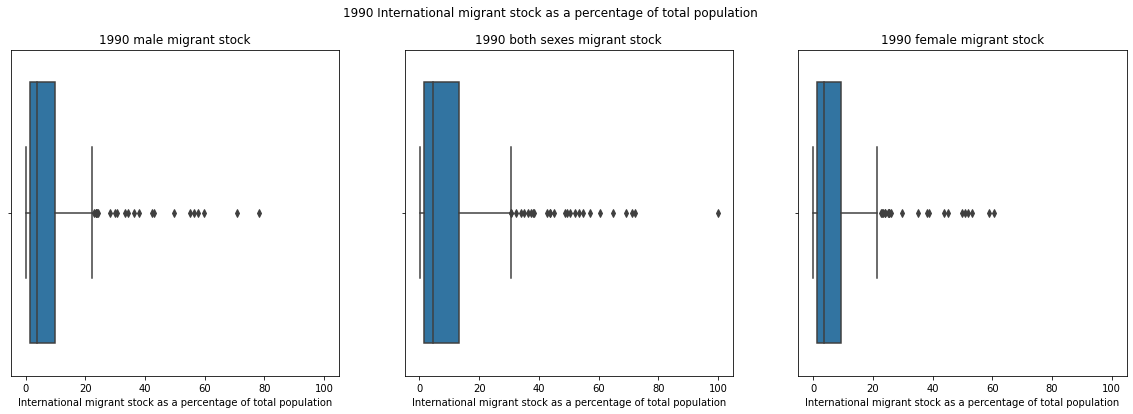

In [186]:
#Creating boxplot
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (20, 6))


ax[0].set_title('1990 male migrant stock') #this plot will be set in position 0
sns.boxplot(UN_1990_male['International migrant stock as a percentage of total population'], ax = ax[0])

ax[1].set_title('1990 both sexes migrant stock') #this plot will be set in position 1
sns.boxplot(UN_1990_both_sexes['International migrant stock as a percentage of total population'], ax = ax[1])

ax[2].set_title('1990 female migrant stock')#this plot will be set in position 2
sns.boxplot(UN_1990_female['International migrant stock as a percentage of total population'], ax = ax[2])

fig.suptitle('1990 International migrant stock as a percentage of total population') #the main title
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


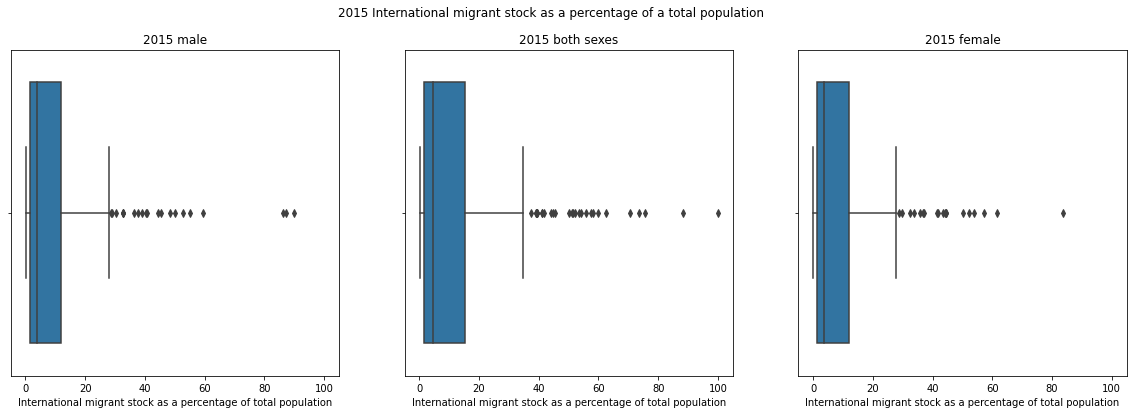

In [187]:
#Same as previous boxplots
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (20, 6))


ax[0].set_title('2015 male')
sns.boxplot(UN_2015_male['International migrant stock as a percentage of total population'], ax = ax[0])

ax[1].set_title('2015 both sexes')
sns.boxplot(UN_2015_both_sexes['International migrant stock as a percentage of total population'], ax = ax[1])

ax[2].set_title('2015 female')
sns.boxplot(UN_2015_female['International migrant stock as a percentage of total population'], ax = ax[2])

fig.suptitle('2015 International migrant stock as a percentage of a total population')
plt.show()

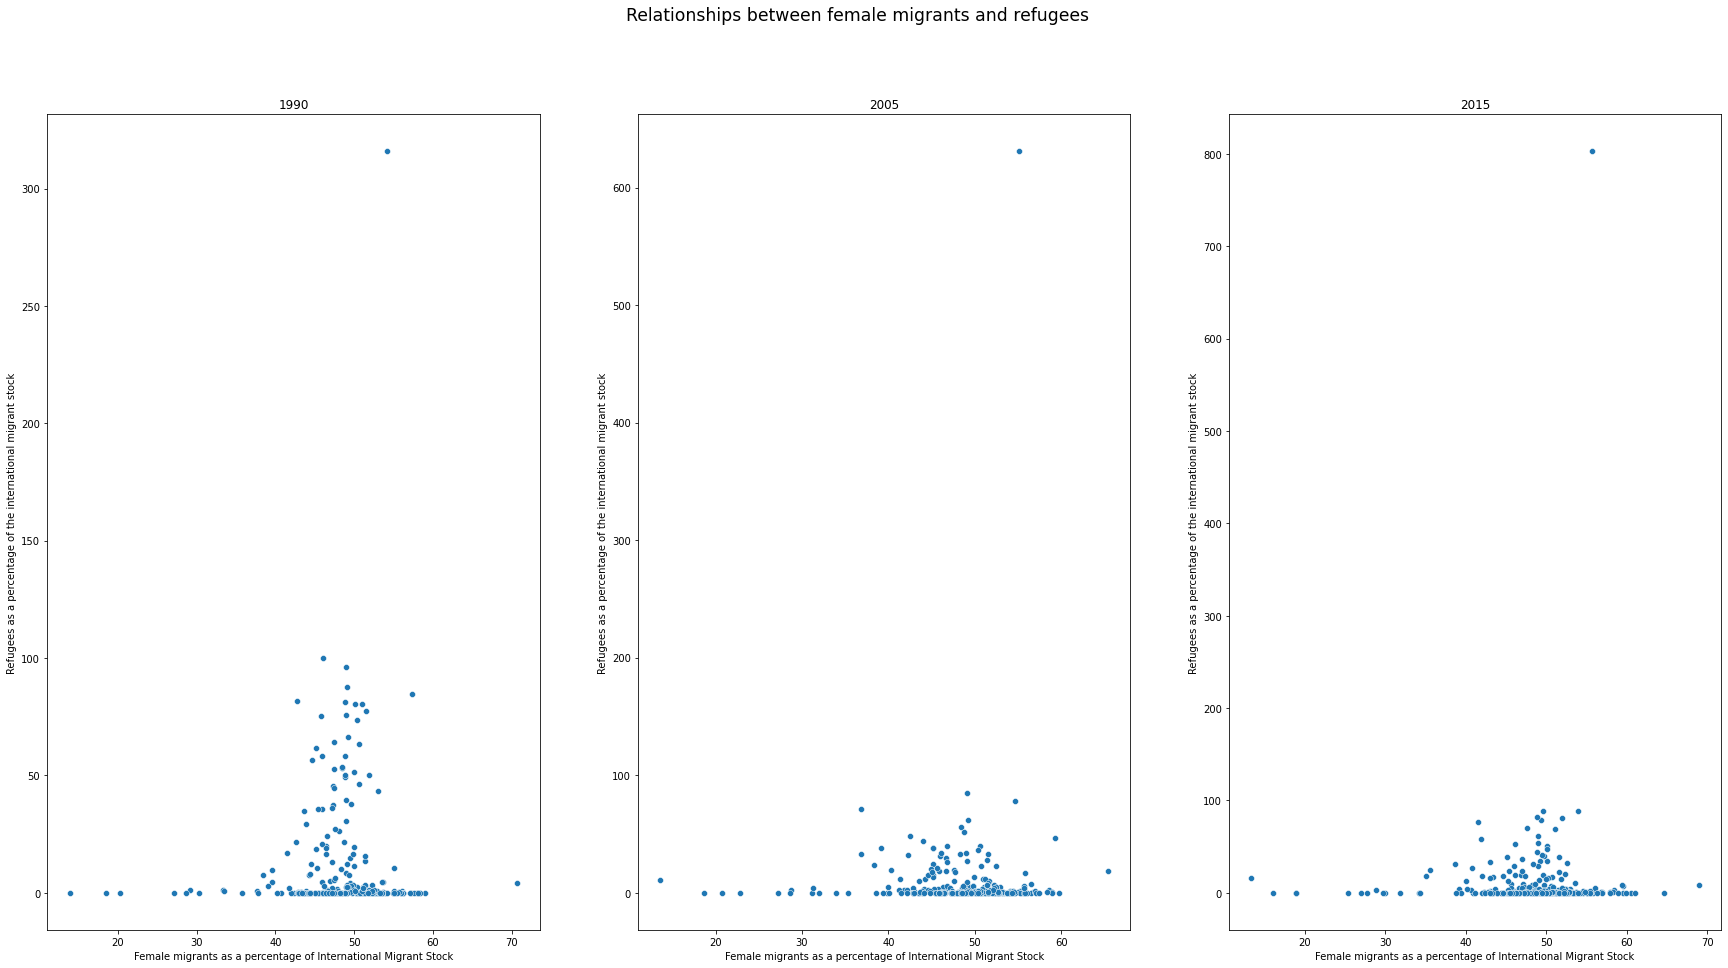

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [188]:
#Creat scatter plots
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (30,15))

ax[0].set_title('1990')
plt.figure(figsize = (8, 8))# adjust figure size
sns.scatterplot(x = UN_1990_female['Female migrants as a percentage of International Migrant Stock'], 
                y = UN_1990_both_sexes['Refugees as a percentage of the international migrant stock'], ax = ax[0])#this plot will be set in position 0

ax[1].set_title('2005')
plt.figure(figsize = (8, 8))
sns.scatterplot(x = UN_2005_female['Female migrants as a percentage of International Migrant Stock'],
                y = UN_2005_both_sexes['Refugees as a percentage of the international migrant stock'], ax = ax[1])#this plot will be set in position 1

ax[2].set_title('2015')
plt.figure(figsize = (8, 8))
sns.scatterplot(x = UN_2015_female['Female migrants as a percentage of International Migrant Stock'],
                y = UN_2015_both_sexes['Refugees as a percentage of the international migrant stock'], ax = ax[2])#this plot will be set in position 2

fig.suptitle('Relationships between female migrants and refugees', fontsize = 'xx-large') #the main title
plt.show()

In [189]:
#Creat 3 dataframes of selected regions in 3 different years
selected_areas_1990 = UN_1990_both_sexes.set_index('Sort/Order').loc[
                              [1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]

selected_areas_2005 = UN_2005_both_sexes.set_index('Sort/Order').loc[
                              [1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]

selected_areas_2015 = UN_2015_both_sexes.set_index('Sort/Order').loc[
                              [1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]

In [190]:
selected_areas_1990 = selected_areas_1990.sort_values(by = 'International migrant stock', ascending = False)
selected_areas_2005 = selected_areas_2005.sort_values(by = 'International migrant stock', ascending = False)
selected_areas_2015 = selected_areas_2015.sort_values(by = 'International migrant stock', ascending = False) #Sort them 

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


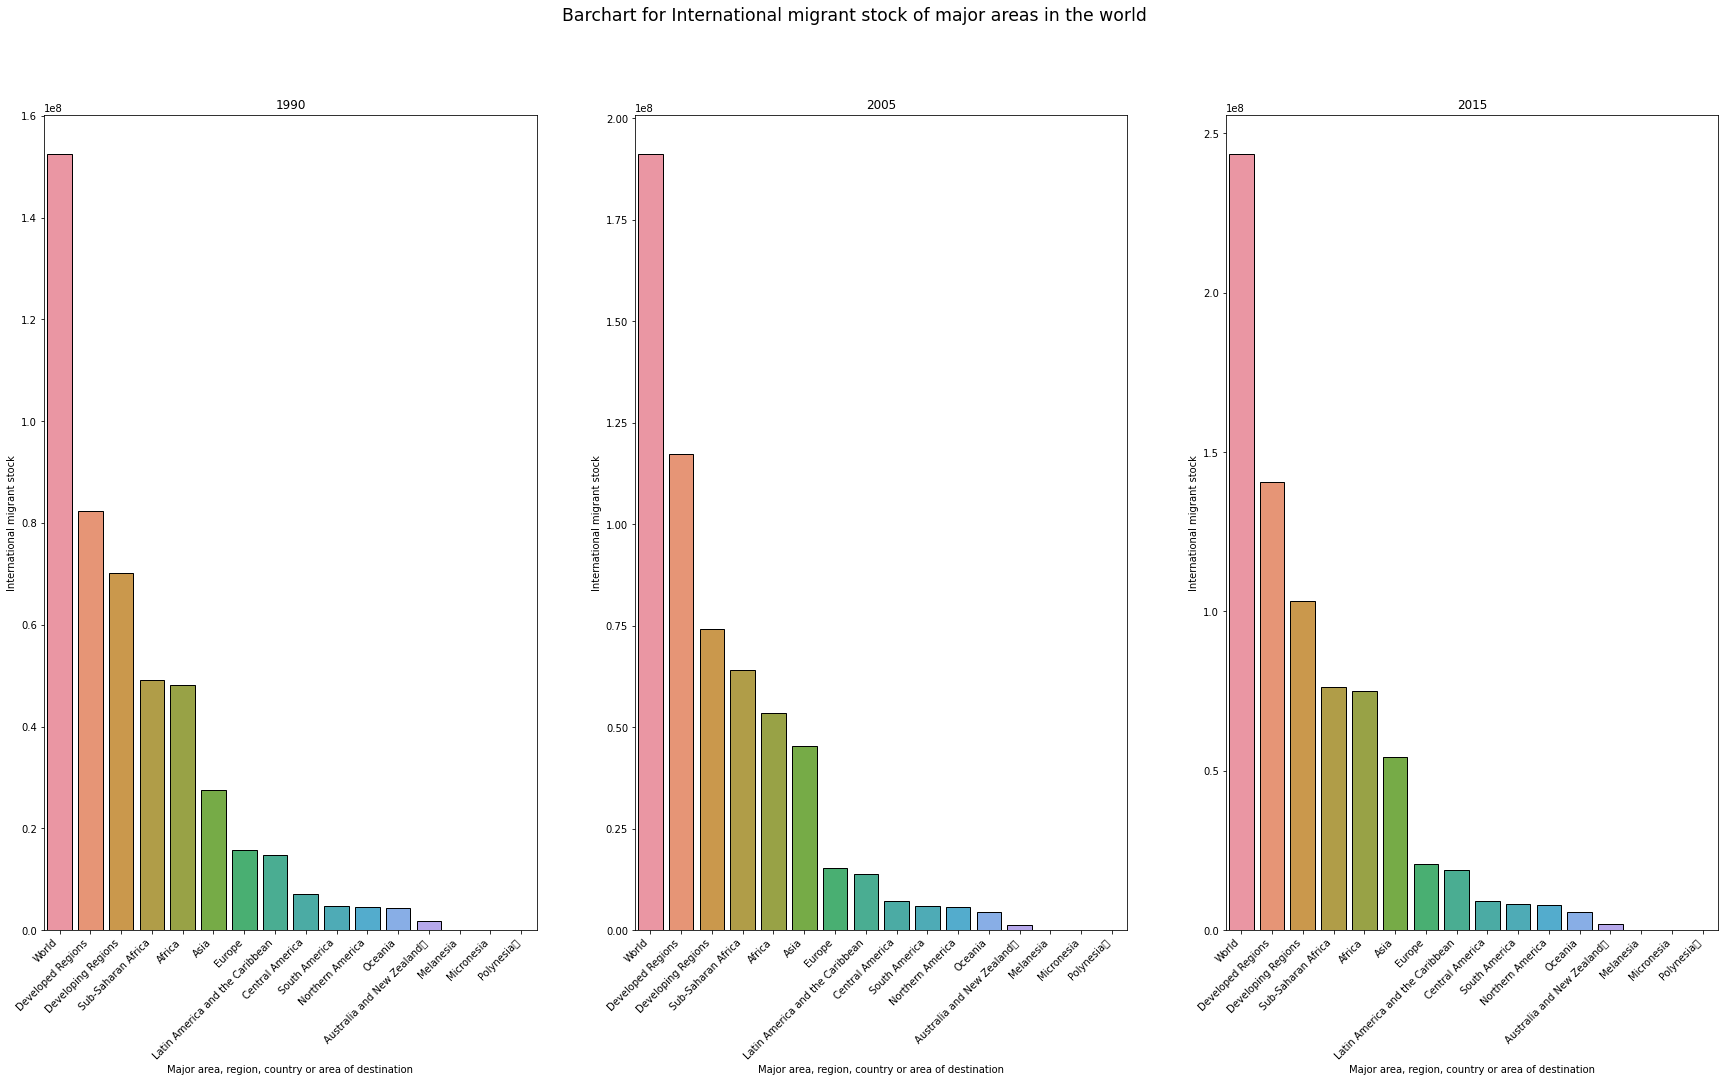

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [191]:
#Creat barchart
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex = True, figsize = (30, 15))

x = ['World', 'Developed Regions', 'Developing Regions', 'Sub-Saharan Africa', 'Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
'Central America', 'South America', 'Northern America', 'Oceania', 'Australia and New Zealand	', 'Melanesia', 'Micronesia', 'Polynesia	'] #the list of the selected region


axs[0].set_title('1990')
figure(num = None, figsize = (20,10), dpi = 80, facecolor = 'w', edgecolor = 'r')
sns.barplot(x = selected_areas_1990['Major area, region, country or area of destination'], 
            y = selected_areas_1990['International migrant stock'], ax = axs[0])#this plot will be set in position 0
axs[0].set_xticklabels(x, rotation = 45, ha = 'right')

axs[1].set_title('2005')
figure(num = None, figsize = (20,10), dpi = 80, facecolor = 'w', edgecolor = 'r')
sns.barplot(x = selected_areas_2005['Major area, region, country or area of destination'], 
            y = selected_areas_2005['International migrant stock'], ax = axs[1])#this plot will be set in position 1
axs[1].set_xticklabels(x, rotation = 45, ha = 'right')

axs[2].set_title('2015')
figure(num = None, figsize = (20,10), dpi = 80, facecolor = 'w', edgecolor = 'r')
sns.barplot(x = selected_areas_2015['Major area, region, country or area of destination'], 
            y = selected_areas_2015['International migrant stock'], ax = axs[2])#this plot will be set in position 2
axs[2].set_xticklabels(x, rotation = 45, ha = 'right')

fig.suptitle('Barchart for International migrant stock of major areas in the world', fontsize = 'xx-large')#the main title

plt.show()

In [192]:
#create a temporary data to store female migrants as a percentage of international migrant stock
temp_data = {'1990': UN_1990_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Female migrants as a percentage of International Migrant Stock'],
             '1995': UN_1995_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Female migrants as a percentage of International Migrant Stock'],
             '2000': UN_2000_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Female migrants as a percentage of International Migrant Stock'],
             '2005': UN_2005_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Female migrants as a percentage of International Migrant Stock'],
             '2010': UN_2010_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Female migrants as a percentage of International Migrant Stock'],
             '2015': UN_2015_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Female migrants as a percentage of International Migrant Stock']}

temp_df = pd.DataFrame(temp_data) #Make it a dataframe

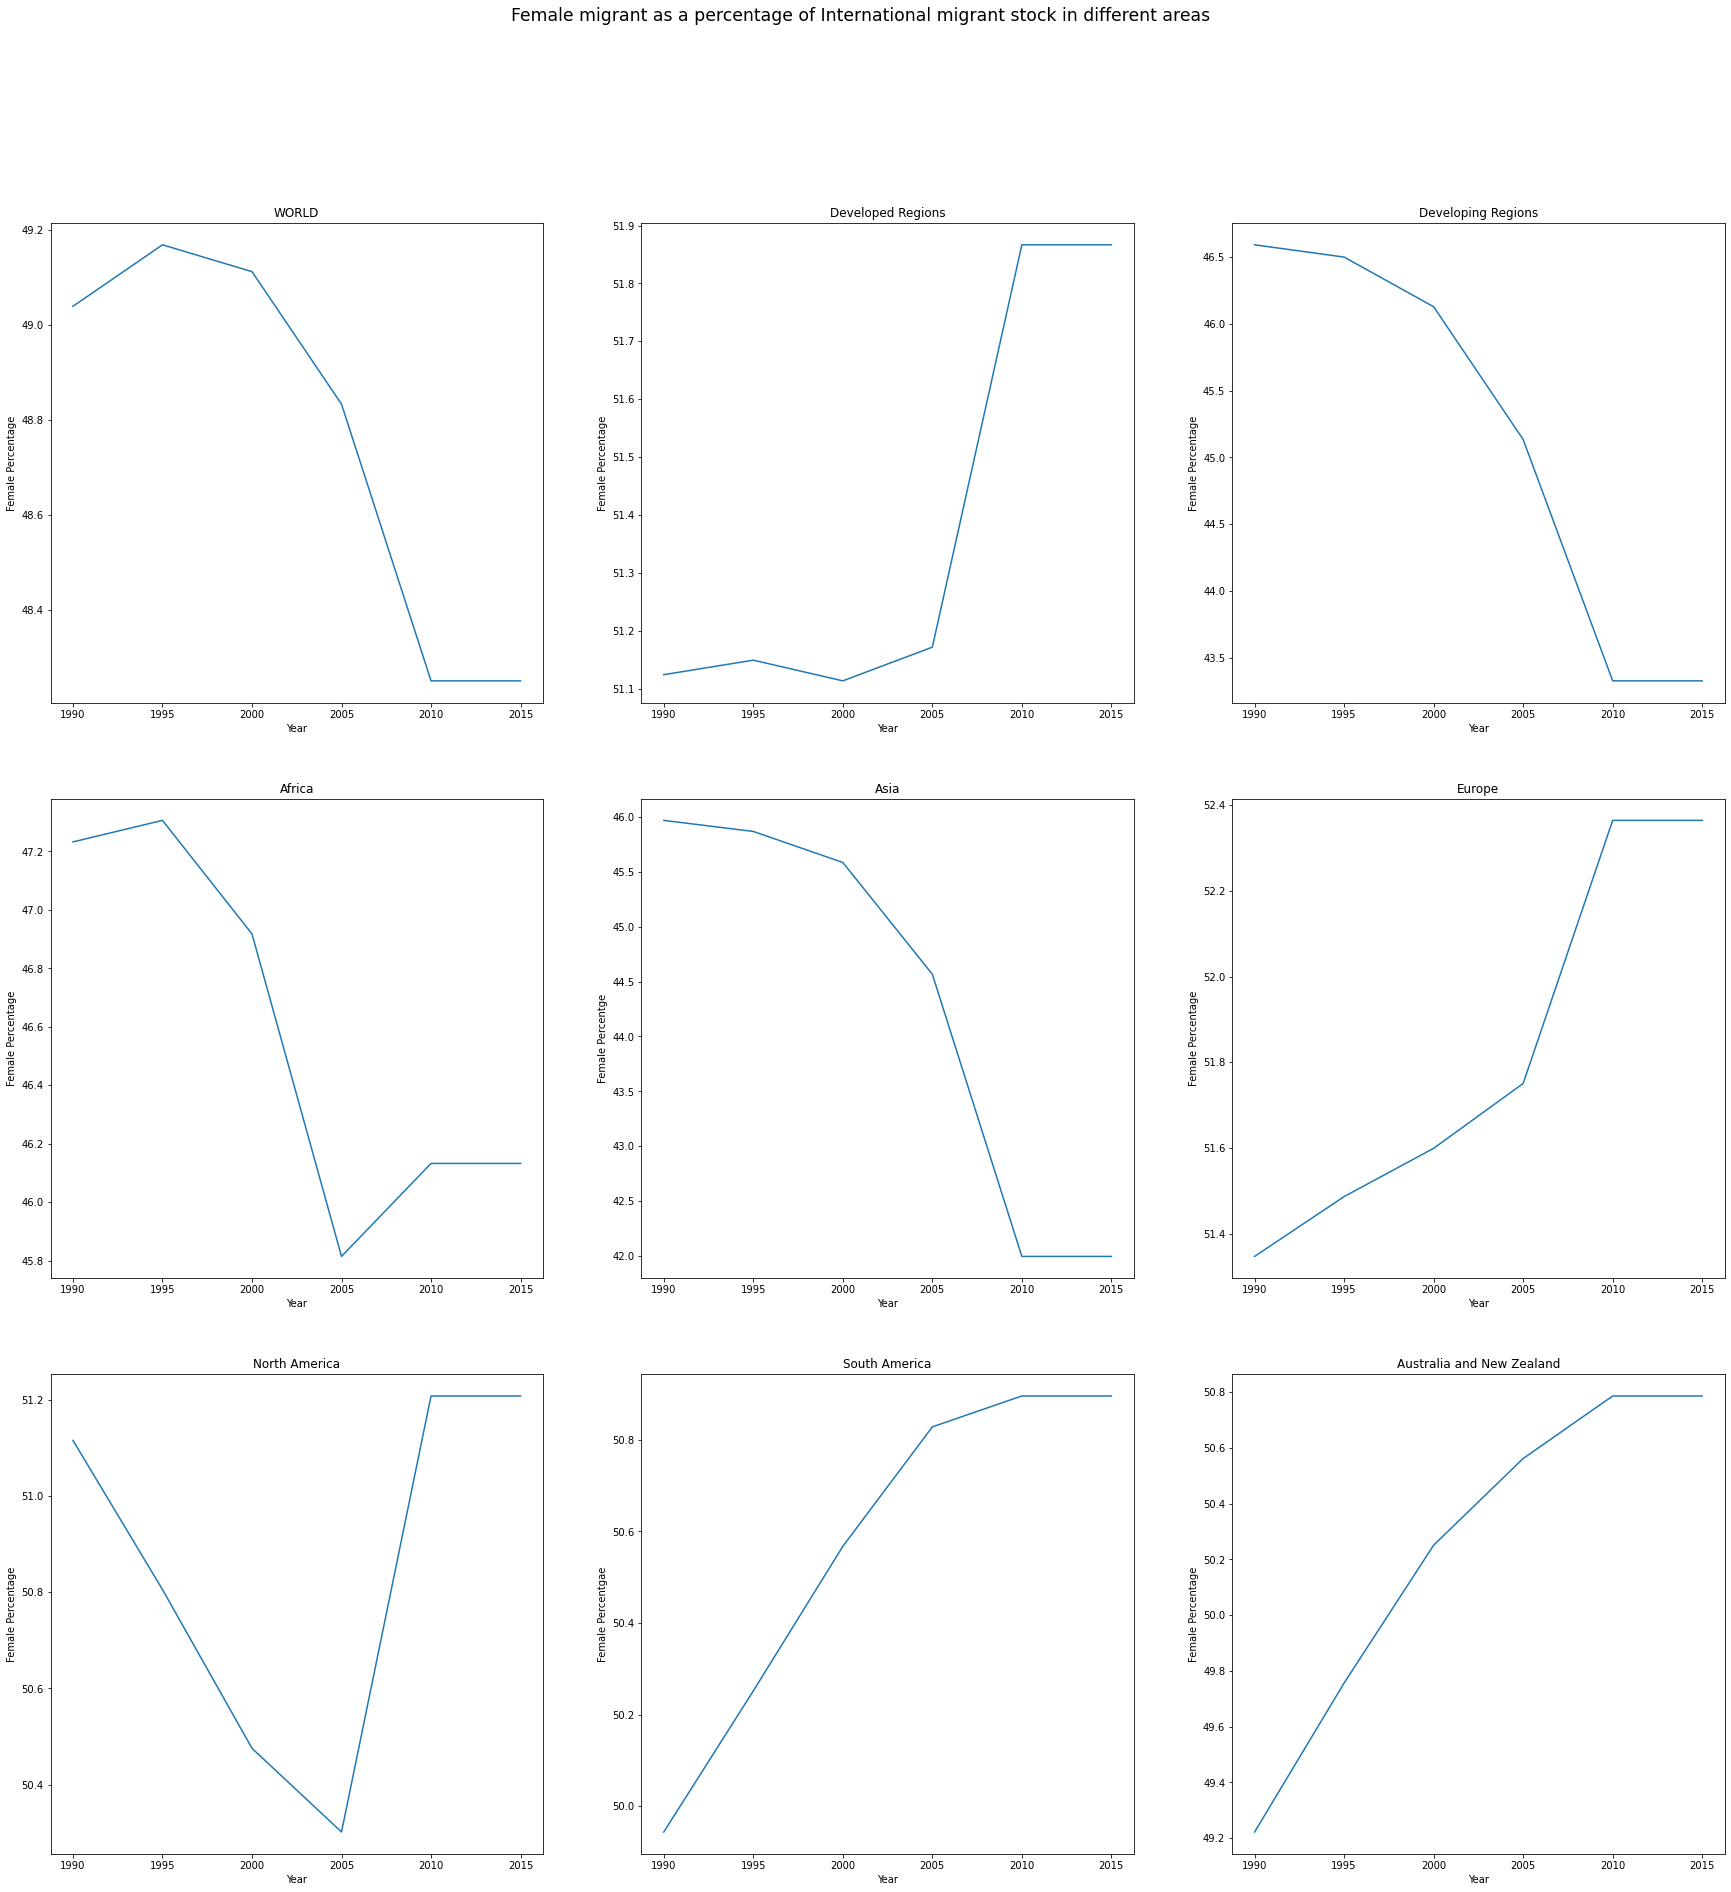

In [193]:
#Create line chart
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 30))

#World
ax[0, 0].set_title('WORLD')
ax[0, 0].set_ylabel('Female Percentage')
ax[0, 0].set_xlabel('Year')
sns.lineplot(y = temp_df.loc[1], x = ['1990', '1995', '2000', '2005', '2010', '2015'], ax = ax[0, 0])
#Developed Regions
ax[0, 1].set_title('Developed Regions')
ax[0, 1].set_ylabel('Female Percentage')
ax[0, 1].set_xlabel('Year')
sns.lineplot(y = temp_df.loc[2], x = ['1990', '1995', '2000', '2005', '2010', '2015'], ax = ax[0, 1])
#Developing Regions
ax[0, 2].set_title('Developing Regions')
ax[0, 2].set_ylabel('Female Percentage')
ax[0, 2].set_xlabel('Year')
sns.lineplot(y = temp_df.loc[3], x = ['1990', '1995', '2000', '2005', '2010', '2015'], ax = ax[0, 2])
#Africa
ax[1, 0].set_title('Africa')
ax[1, 0].set_ylabel('Female Percentage')
ax[1, 0].set_xlabel('Year')
sns.lineplot(y = temp_df.loc[7], x = ['1990', '1995', '2000', '2005', '2010', '2015'], ax = ax[1, 0])
#Asia
ax[1, 1].set_title('Asia')
ax[1, 1].set_ylabel('Female Percentge')
ax[1, 1].set_xlabel('Year')
sns.lineplot(y = temp_df.loc[71], x = ['1990', '1995', '2000', '2005', '2010', '2015'], ax = ax[1, 1])
#Europe
ax[1, 2].set_title('Europe')
ax[1, 2].set_ylabel('Female Percentage')
ax[1, 2].set_xlabel('Year')
sns.lineplot(y = temp_df.loc[127], x = ['1990', '1995', '2000', '2005', '2010', '2015'], ax = ax[1, 2])
#North America
ax[2, 0].set_title('North America')
ax[2, 0].set_ylabel('Female Percentage')
ax[2, 0].set_xlabel('Year')
sns.lineplot(y = temp_df.loc[232], x = ['1990', '1995', '2000', '2005', '2010', '2015'], ax = ax[2, 0])
#South America
ax[2, 1].set_title('South America')
ax[2, 1].set_ylabel('Female Percentgae')
ax[2, 1].set_xlabel('Year')
sns.lineplot(y = temp_df.loc[217], x = ['1990', '1995', '2000', '2005', '2010', '2015'], ax = ax[2, 1])
#Australia and New Zealand
ax[2, 2].set_title('Australia and New Zealand')
ax[2, 2].set_ylabel('Female Percentage')
ax[2, 2].set_xlabel('Year')
sns.lineplot(y = temp_df.loc[239], x = ['1990', '1995', '2000', '2005', '2010', '2015'], ax = ax[2, 2])

fig.suptitle('Female migrant as a percentage of International migrant stock in different areas', fontsize = 'xx-large')
plt.show()

In [194]:
#Creat 5 temporary data of annual rate of percenatge of the refugee stock in the period
temp1 = UN_1995_both_sexes[['Period', 'Annual Rate of Percentage of the Refugee stock in the period']]
temp2 = UN_2000_both_sexes[['Period', 'Annual Rate of Percentage of the Refugee stock in the period']]
temp3 = UN_2005_both_sexes[['Period', 'Annual Rate of Percentage of the Refugee stock in the period']]
temp4 = UN_2010_both_sexes[['Period', 'Annual Rate of Percentage of the Refugee stock in the period']]
temp5 = UN_2015_both_sexes[['Period', 'Annual Rate of Percentage of the Refugee stock in the period']]

In [195]:
violin_temp = temp1.append(temp2).append(temp3).append(temp4).append(temp5) #combine them
violin_temp 

,Period,Annual Rate of Percentage of the Refugee stock in the period
0,(1990-1995),-2.123497
1,(1990-1995),9.388424
2,(1990-1995),-2.839417
3,(1990-1995),-0.680327
4,(1990-1995),-4.383600
...,...,...
260,(2010-2015),NaN
261,(2010-2015),NaN
262,(2010-2015),NaN
263,(2010-2015),NaN


Text(0, 0.5, 'Annual Rate of change of the Refugee stock in the period')

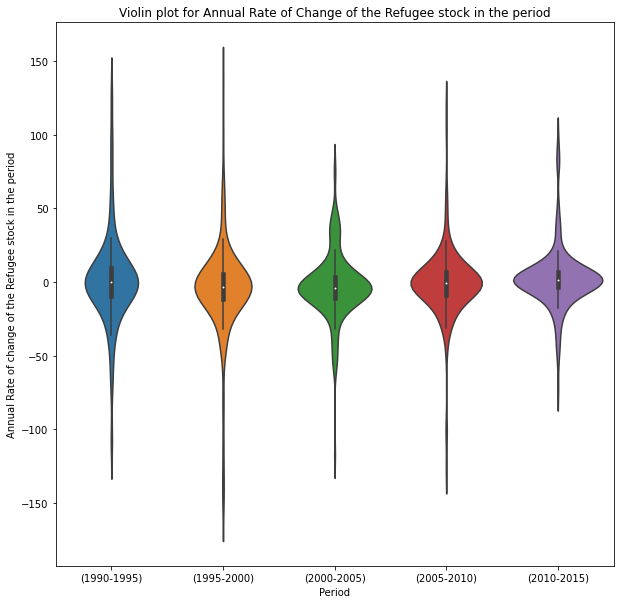

In [196]:
#make violin plot
fig, ax = plt.subplots(figsize = (10, 10))

sns.violinplot(y = 'Annual Rate of Percentage of the Refugee stock in the period', x = 'Period',  data = violin_temp)
plt.title('Violin plot for Annual Rate of Change of the Refugee stock in the period')
plt.ylabel('Annual Rate of change of the Refugee stock in the period')

In [197]:
#female temporary data
temp_data_migrant_change_female = {
              '1990-1995': UN_1995_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '1995-2000': UN_2000_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '2000-2005': UN_2005_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '2005-2010': UN_2010_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '2010-2015': UN_2015_female.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period']}

temp_df_migrant_female = pd.DataFrame(temp_data_migrant_change_female) #Make it a dataframe
#male temporary data
temp_data_migrant_change_male = {
              '1990-1995': UN_1995_male.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '1995-2000': UN_2000_male.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '2000-2005': UN_2005_male.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '2005-2010': UN_2010_male.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '2010-2015': UN_2015_male.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period']}

temp_df_migrant_male = pd.DataFrame(temp_data_migrant_change_male) #make it a dataframe
#both sexes temporary data
temp_data_migrant_change_both_sexes = {
              '1990-1995': UN_1995_both_sexes.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '1995-2000': UN_2000_both_sexes.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '2000-2005': UN_2005_both_sexes.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '2005-2010': UN_2010_both_sexes.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period'],
             '2010-2015': UN_2015_both_sexes.set_index('Sort/Order').loc[[1, 2, 3, 6, 7, 71, 127, 180, 208, 217, 232, 238, 239, 242, 248, 256]]
             ['Annual rate of change of migrant stock in Period']}

temp_df_migrant_both_sexes = pd.DataFrame(temp_data_migrant_change_both_sexes) #make it a data frame

In [198]:
#Creat a new temporary dataframe to plot line chart for 3 different sexes
temp_df_both = pd.DataFrame({'sex': 'both sexes',
                             'Period': ['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'],
                  'World': temp_df_migrant_both_sexes.loc[1].values.flatten().tolist(),
                  'Developed Regions': temp_df_migrant_both_sexes.loc[2].values.flatten().tolist(),
                  'Developing Regions': temp_df_migrant_both_sexes.loc[3].values.flatten().tolist(),
                  'Sub-Saharan Africa': temp_df_migrant_both_sexes.loc[6].values.flatten().tolist(),
                  'Africa': temp_df_migrant_both_sexes.loc[7].values.flatten().tolist(),
                  'Asia': temp_df_migrant_both_sexes.loc[71].values.flatten().tolist(),
                  'Europe': temp_df_migrant_both_sexes.loc[127].values.flatten().tolist(),
                  'Latin America and the Caribbean': temp_df_migrant_both_sexes.loc[180].values.flatten().tolist(),
                  'Central America': temp_df_migrant_both_sexes.loc[208].values.flatten().tolist(),
                  'South America': temp_df_migrant_both_sexes.loc[217].values.flatten().tolist(),
                  'Northern America': temp_df_migrant_both_sexes.loc[232].values.flatten().tolist(),
                  'Oceania': temp_df_migrant_both_sexes.loc[238].values.flatten().tolist(),
                  'Australia and New Zealand ': temp_df_migrant_both_sexes.loc[239].values.flatten().tolist(),
                  'Melanesia': temp_df_migrant_both_sexes.loc[242].values.flatten().tolist(),
                  'Micronesia': temp_df_migrant_both_sexes.loc[248].values.flatten().tolist(),
                  'Polynesia': temp_df_migrant_both_sexes.loc[256].values.flatten().tolist()})

temp_df_male = pd.DataFrame({'sex': 'male',
                             'Period': ['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'],
                  'World': temp_df_migrant_male.loc[1].values.flatten().tolist(),
                  'Developed Regions': temp_df_migrant_male.loc[2].values.flatten().tolist(),
                  'Developing Regions': temp_df_migrant_male.loc[3].values.flatten().tolist(),
                  'Sub-Saharan Africa': temp_df_migrant_male.loc[6].values.flatten().tolist(),
                  'Africa': temp_df_migrant_male.loc[7].values.flatten().tolist(),
                  'Asia': temp_df_migrant_male.loc[71].values.flatten().tolist(),
                  'Europe': temp_df_migrant_male.loc[127].values.flatten().tolist(),
                  'Latin America and the Caribbean': temp_df_migrant_male.loc[180].values.flatten().tolist(),
                  'Central America': temp_df_migrant_male.loc[208].values.flatten().tolist(),
                  'South America': temp_df_migrant_male.loc[217].values.flatten().tolist(),
                  'Northern America': temp_df_migrant_male.loc[232].values.flatten().tolist(),
                  'Oceania': temp_df_migrant_male.loc[238].values.flatten().tolist(),
                  'Australia and New Zealand ': temp_df_migrant_male.loc[239].values.flatten().tolist(),
                  'Melanesia': temp_df_migrant_male.loc[242].values.flatten().tolist(),
                  'Micronesia': temp_df_migrant_male.loc[248].values.flatten().tolist(),
                  'Polynesia': temp_df_migrant_male.loc[256].values.flatten().tolist()})

temp_df_female = pd.DataFrame({'sex': 'female',
                               'Period': ['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015'],
                  'World': temp_df_migrant_female.loc[1].values.flatten().tolist(),
                  'Developed Regions': temp_df_migrant_female.loc[2].values.flatten().tolist(),
                  'Developing Regions': temp_df_migrant_female.loc[3].values.flatten().tolist(),
                  'Sub-Saharan Africa': temp_df_migrant_female.loc[6].values.flatten().tolist(),
                  'Africa': temp_df_migrant_female.loc[7].values.flatten().tolist(),
                  'Asia': temp_df_migrant_female.loc[71].values.flatten().tolist(),
                  'Europe': temp_df_migrant_female.loc[127].values.flatten().tolist(),
                  'Latin America and the Caribbean': temp_df_migrant_female.loc[180].values.flatten().tolist(),
                  'Central America': temp_df_migrant_female.loc[208].values.flatten().tolist(),
                  'South America': temp_df_migrant_female.loc[217].values.flatten().tolist(),
                  'Northern America': temp_df_migrant_female.loc[232].values.flatten().tolist(),
                  'Oceania': temp_df_migrant_female.loc[238].values.flatten().tolist(),
                  'Australia and New Zealand ': temp_df_migrant_female.loc[239].values.flatten().tolist(),
                  'Melanesia': temp_df_migrant_female.loc[242].values.flatten().tolist(),
                  'Micronesia': temp_df_migrant_female.loc[248].values.flatten().tolist(),
                  'Polynesia': temp_df_migrant_female.loc[256].values.flatten().tolist()})

temp_df2 = temp_df_both.append(temp_df_male).append(temp_df_female).reset_index()

In [199]:
temp_df2

,index,sex,Period,World,Developed Regions,Developing Regions,Sub-Saharan Africa,Africa,Asia,Europe,Latin America and the Caribbean,Central America,South America,Northern America,Oceania,Australia and New Zealand,Melanesia,Micronesia,Polynesia
0,0,both sexes,1990-1995,1.051865,2.275847,-0.487389,0.845374,0.826734,-0.673431,1.420702,-1.371210,-6.854745,-0.198202,3.771892,1.195481,1.166607,1.415918,1.708527,2.073597
1,1,both sexes,1995-2000,1.428058,2.264965,0.241777,-2.217102,-1.995043,1.165255,1.257523,-0.350228,-3.187106,-0.122135,3.816898,1.301768,1.318375,-0.576240,1.849488,1.742491
2,2,both sexes,2000-2005,2.042124,2.507080,1.328107,0.339100,0.521298,1.570402,2.600875,1.897433,4.480801,1.390284,2.341363,2.333727,2.424987,1.981858,-0.277834,0.687072
3,3,both sexes,2005-2010,2.954160,2.466343,3.702217,2.101477,2.060902,4.221680,2.432375,2.603733,4.667334,2.588966,2.428884,3.360109,3.555413,0.344728,-1.987449,-0.043507
4,4,both sexes,2010-2015,1.890991,1.160824,2.929634,4.069823,4.078721,2.604270,1.015888,2.280741,3.068846,2.494883,1.236885,2.566253,2.663456,0.726765,-0.081546,-0.245848
5,0,male,1990-1995,1.000922,2.265595,-0.452980,0.738940,0.798774,-0.636150,1.363213,-1.424381,-6.791343,-0.321643,3.898245,0.973073,0.954996,1.515038,0.706427,1.860896
6,1,male,1995-2000,1.450294,2.279583,0.380246,-2.170047,-1.848117,1.269413,1.211037,-0.398563,-2.955229,-0.249417,3.950502,1.080125,1.120714,-0.519928,0.588287,1.549439
7,2,male,2000-2005,2.151575,2.483259,1.693824,0.637663,0.932749,1.941179,2.538277,1.810258,4.420627,1.284476,2.411456,2.210557,2.299668,2.136676,-0.360236,0.469035
8,3,male,2005-2010,3.159228,2.265689,4.352954,1.906517,1.872454,5.113896,2.291735,2.585015,4.676090,2.577797,2.118884,3.375269,3.580413,0.265273,-1.712846,-0.135288
9,4,male,2010-2015,1.912603,1.074685,2.927058,4.194878,4.149396,2.618984,0.900411,2.272761,3.096748,2.478566,1.179070,2.450290,2.547473,0.787637,0.026633,-0.296560


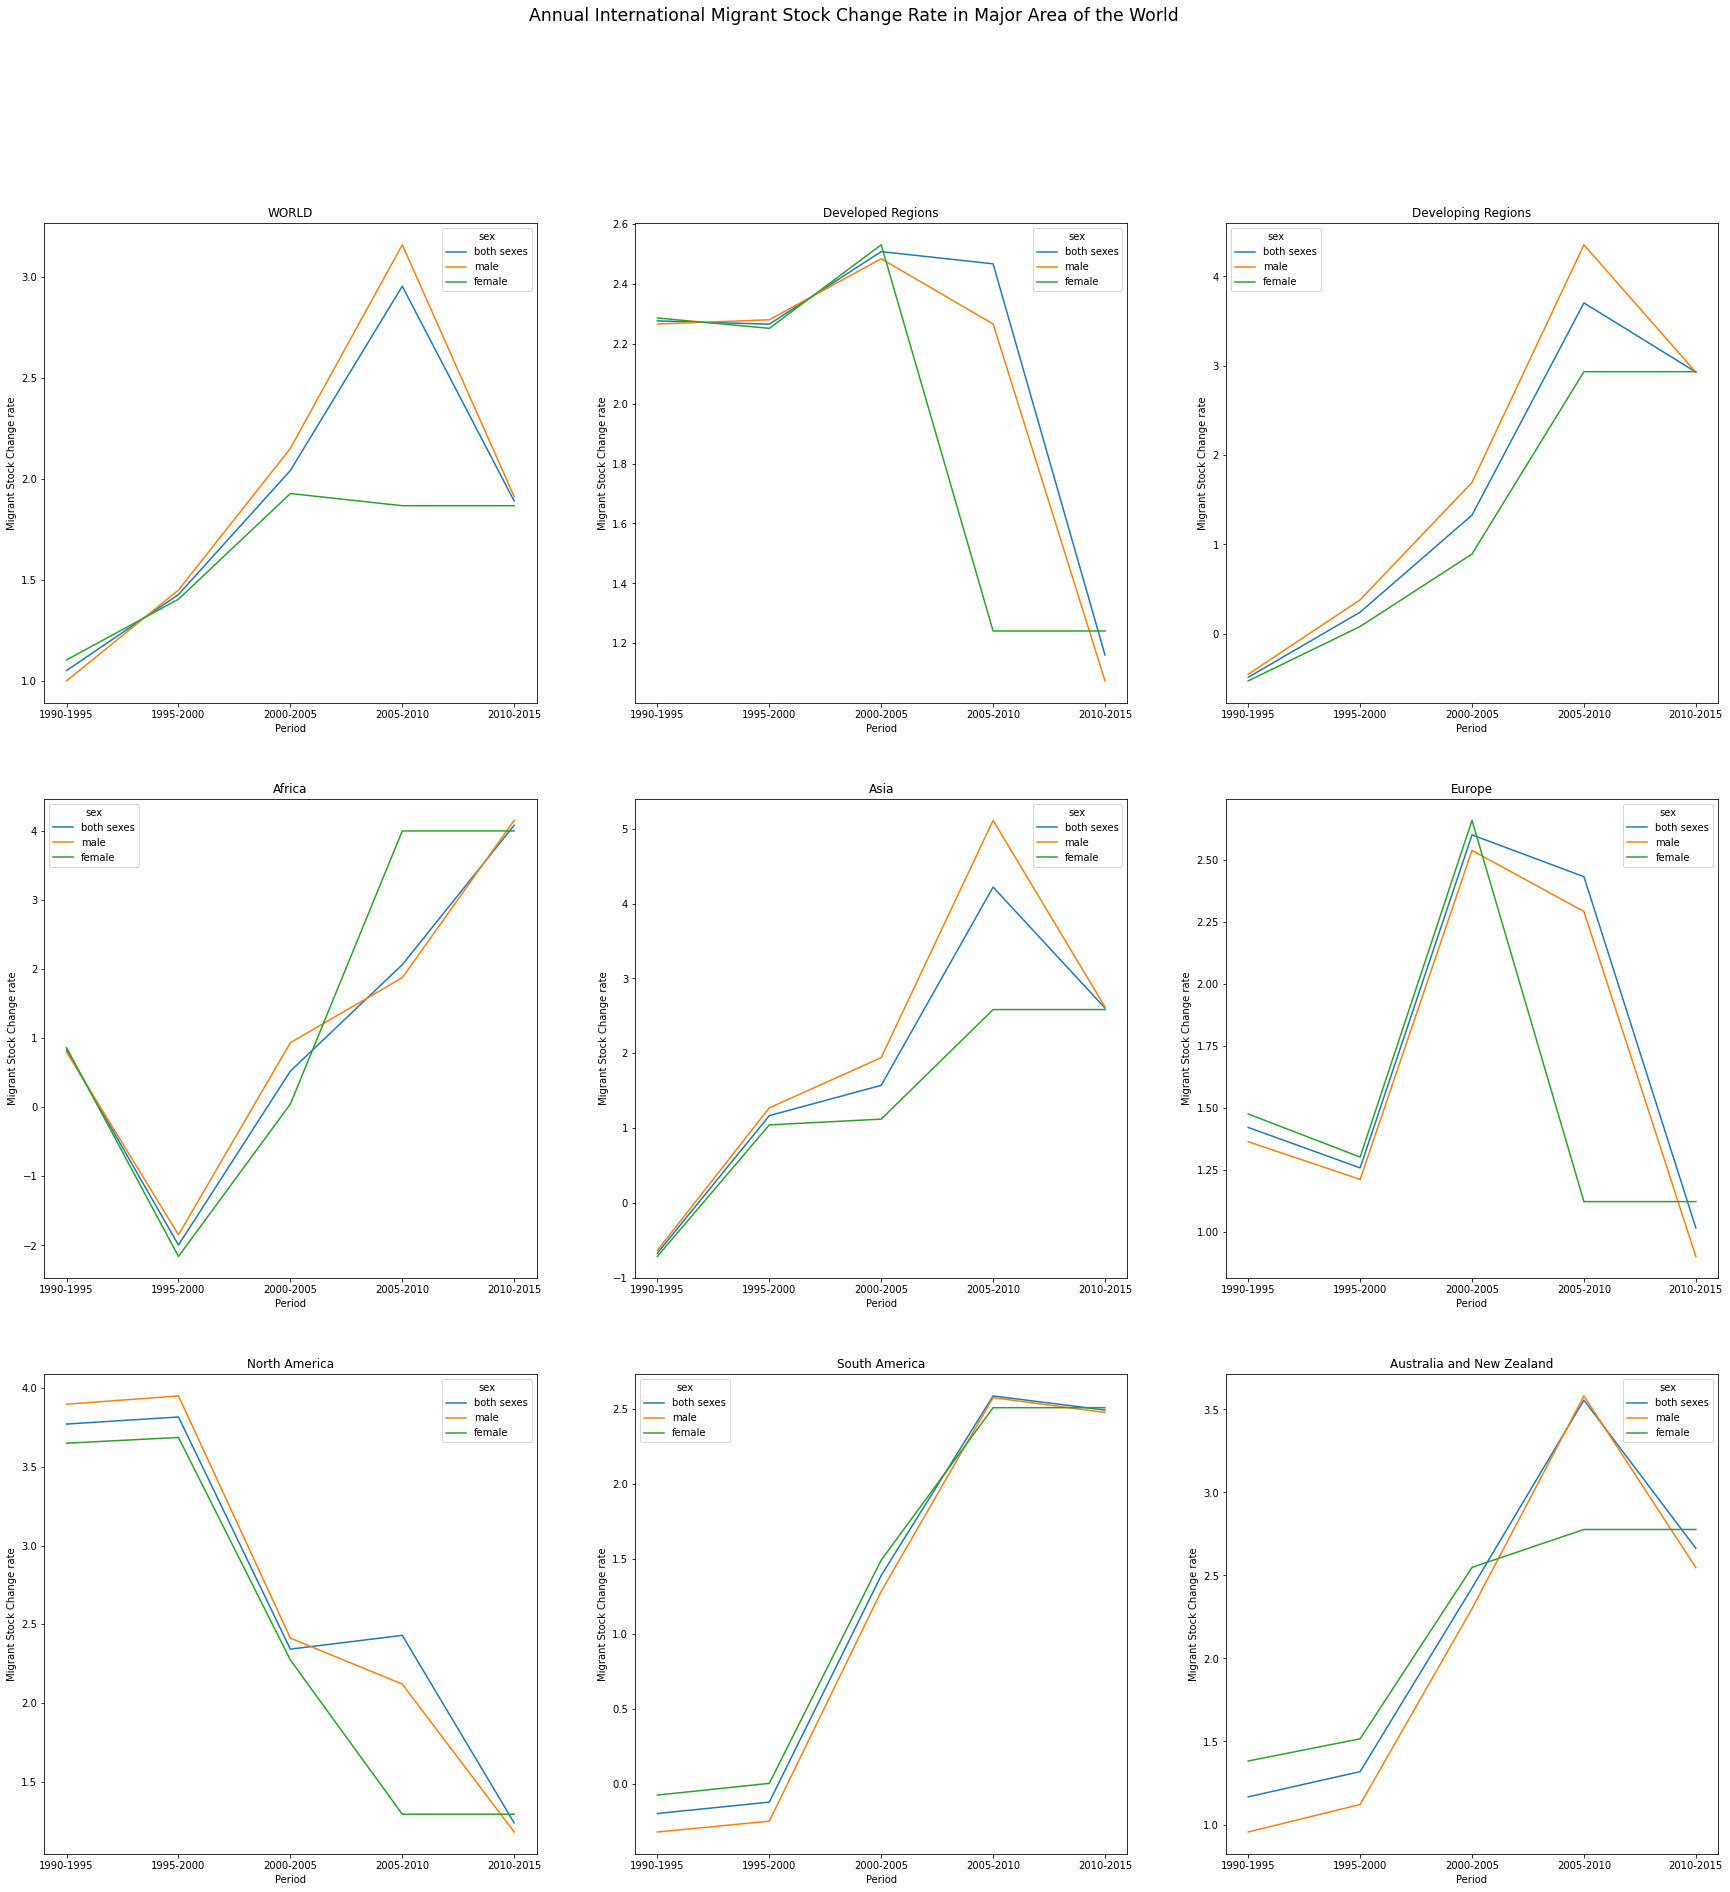

In [200]:
#plot line chart
fig, ax = subplots(3, 3, figsize = (30, 30))

#World
ax[0, 0].set_title('WORLD')
ax[0, 0].set_ylabel('Migrant Stock Change rate')
ax[0, 0].set_xlabel('Period')
sns.lineplot(y = 'World', x = 'Period', data = temp_df2, hue = 'sex', ax = ax[0, 0])
#Developed Regions
ax[0, 1].set_title('Developed Regions')
ax[0, 1].set_ylabel('Migrant Stock Change rate')
ax[0, 1].set_xlabel('Period')
sns.lineplot(y = 'Developed Regions', x = 'Period', data = temp_df2, hue = 'sex', ax = ax[0, 1])
#Developing Regions
ax[0, 2].set_title('Developing Regions')
ax[0, 2].set_ylabel('Migrant Stock Change rate')
ax[0, 2].set_xlabel('Period')
sns.lineplot(y = 'Developing Regions', x = 'Period', data = temp_df2, hue = 'sex', ax = ax[0, 2])
#Africa
ax[1, 0].set_title('Africa')
ax[1, 0].set_ylabel('Migrant Stock Change rate')
ax[1, 0].set_xlabel('Period')
sns.lineplot(y = 'Africa', x = 'Period', data = temp_df2, hue = 'sex', ax = ax[1, 0])
#Asia
ax[1, 1].set_title('Asia')
ax[1, 1].set_ylabel('Migrant Stock Change rate')
ax[1, 1].set_xlabel('Period')
sns.lineplot(y = 'Asia', x = 'Period', data = temp_df2, hue = 'sex', ax = ax[1, 1])
#Europe
ax[1, 2].set_title('Europe')
ax[1, 2].set_ylabel('Migrant Stock Change rate')
ax[1, 2].set_xlabel('Period')
sns.lineplot(y = 'Europe', x = 'Period', data = temp_df2, hue = 'sex', ax = ax[1, 2])
#North America
ax[2, 0].set_title('North America')
ax[2, 0].set_ylabel('Migrant Stock Change rate')
ax[2, 0].set_xlabel('Period')
sns.lineplot(y = 'Northern America', x = 'Period', data = temp_df2, hue = 'sex', ax = ax[2, 0])
#South America
ax[2, 1].set_title('South America')
ax[2, 1].set_ylabel('Migrant Stock Change rate')
ax[2, 1].set_xlabel('Period')
sns.lineplot(y = 'South America', x = 'Period', data = temp_df2, hue = 'sex', ax = ax[2, 1])
#Australia and New Zealand
ax[2, 2].set_title('Australia and New Zealand')
ax[2, 2].set_ylabel('Migrant Stock Change rate')
ax[2, 2].set_xlabel('Period')
sns.lineplot(y = 'Australia and New Zealand ', x = 'Period', data = temp_df2, hue = 'sex', ax = ax[2, 2])

fig.suptitle('Annual International Migrant Stock Change Rate in Major Area of the World', fontsize = 'xx-large')
plt.show()